# Resampling and Regularization 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
DATAPATH = 'data/Advertising.csv'
data = pd.read_csv(DATAPATH, index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
def scatter_plot(feature):
    plt.figure(figsize=(10,5))
    plt.scatter(data[feature], data['sales'], c='black')
    plt.xlabel(f'Money spent on {feature} ads ($)')
    plt.ylabel('Sales (k$)')
    plt.show()

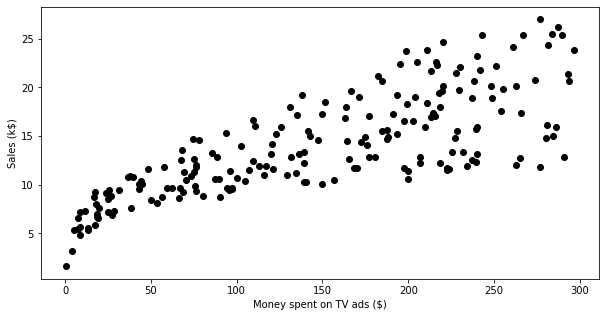

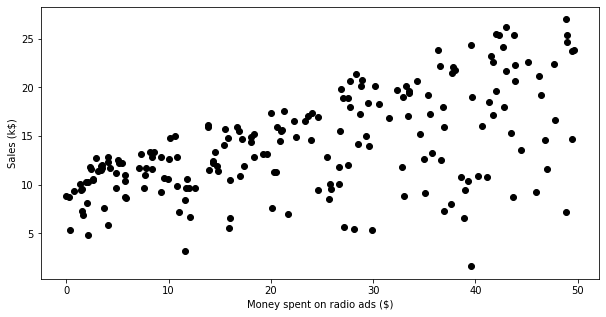

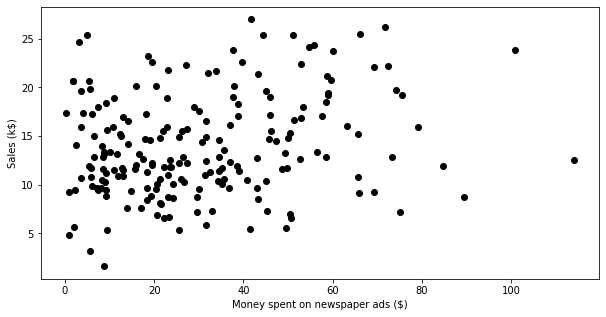

In [9]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

## Baseline model 

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [13]:
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

In [14]:
lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(-mean_MSE)

3.072946597100209


## Regularization

### Ridge regression 

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [16]:
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [18]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
3.0726713383411433


### Lasso 

In [19]:
from sklearn.linear_model import Lasso

In [27]:
lasso = Lasso(tol=0.05)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, y)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.035998320911192
